In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
from sklearn import linear_model


In [13]:
df=pd.read_csv("my2023-fuel-consumption-ratings.csv", encoding='latin1')

In [14]:
df.head()

,Model year,Make,Model,Vehicle class,Enginesize,Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2emissions,CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [15]:
df.describe()

,Model year,Enginesize,Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2emissions,CO2 rating,Smog rating
count,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2023.0,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,0.0,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [16]:
cdf=df[['Enginesize','Make','Model','Cylinders','CO2emissions']]
cdf.head(5)

,Enginesize,Make,Model,Cylinders,CO2emissions
0,1.5,Acura,Integra,4,167
1,1.5,Acura,Integra A-SPEC,4,172
2,1.5,Acura,Integra A-SPEC,4,181
3,3.5,Acura,MDX SH-AWD,6,263
4,3.0,Acura,MDX SH-AWD Type S,6,291


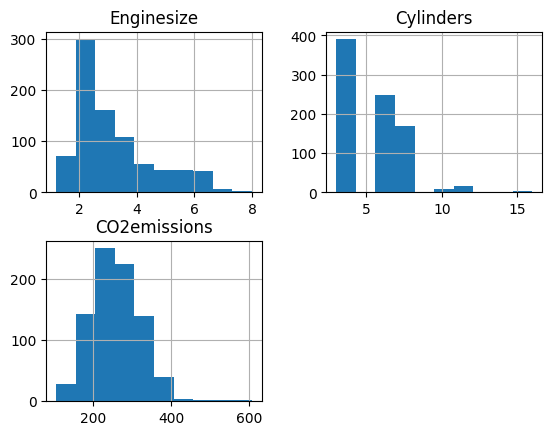

In [17]:
vist=cdf[['Enginesize','Cylinders','CO2emissions']]
vist.hist()
pl.show()

## 80% train

In [19]:
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]

## Multiple Regression Model


## Modeling
0+0x1

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Enginesize','Cylinders']])
train_y = np.asanyarray(train[['CO2emissions']])
regr.fit (train_x, train_y)
print ('Coefficients 0x1: ', regr.coef_)
print ('Intercept 0: ',regr.intercept_)
print('teta0:',regr.coef_[0][0])
print('teta1:',regr.coef_[0][1])


Coefficients 0x1:  [[15.54976278 17.48249969]]
Intercept 0:  [110.59675791]
teta0: 15.54976278290319
teta1: 17.482499691887494


## liner plot

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Enginesize','Cylinders']])
test_y = np.asanyarray(test[['CO2emissions']])
test_y_ = regr.predict(test_x)


print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 26.63
Residual sum of squares (MSE): 1248.74
R2-score: 0.62


## predict

In [46]:
X = np.array([1.5,4]).reshape(-1, 2)
print(X)
Y= regr.predict(X)
print(Y)

[[1.5 4. ]]
[[203.85140086]]
